In [13]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re, math, os
import operator

In [14]:
SAVE = True
SAVE_FOLDER = 'TACT/img/'
os.makedirs(SAVE_FOLDER, exist_ok=True)

In [15]:
def plotConstructivenessToxicity(data, x, y, hue):
    fig = plt.figure()
    
    sns.set_context('talk')
    sns.set(rc={'figure.figsize':(15,10)})
    sns.set(style="whitegrid")
    sns.lineplot(data=data , x=x, y=y,
                 hue=hue, style=hue,
                 palette="tab10", linewidth=3.5, markers=True,
                 legend=False, markersize=20)
    plt.xlabel('Percentage toxicity', fontsize=20)
    plt.ylabel('Number of comments', fontsize=20)
    plt.tight_layout()
    plt.legend(['Non-constructive', 'Constructive'], fontsize='xx-large')
    
    return fig

In [16]:
def preprocessing(constructiveness_df, toxicity_df):
    if ('comment_text' in toxicity_df.columns) and ('pp_comment_text' not in toxicity_df.columns):
        toxicity_df['pp_comment_text'] = toxicity_df['comment_text']
    if ('comment_text' in constructiveness_df.columns):
        constructiveness_df['pp_comment_text'] = constructiveness_df['comment_text']
    
    constructiveness_df['bilstm_prediction'] = constructiveness_df['bilstm_prediction'].round()
    
    combined = constructiveness_df.merge(toxicity_df, left_on='pp_comment_text', right_on='pp_comment_text')[['pp_comment_text', 'bilstm_prediction', 'TOXICITY_probability']].drop_duplicates()
    combined['toxicity_category'] = ((np.floor(combined['TOXICITY_probability'] * 100.0) - (np.floor(combined['TOXICITY_probability'] * 100.0) % 10)) + 5).astype(int)
    grouped = combined.groupby(['bilstm_prediction', 'toxicity_category']).count().reset_index()
    pivoted = grouped.pivot('bilstm_prediction', 'toxicity_category')['pp_comment_text']
    label_df = pd.DataFrame([[0, 'Non-constructive'], [1, 'Constructive']], columns=['bilstm_prediction', 'Prediction'])
    grouped = grouped.merge(label_df, how='left', on='bilstm_prediction')
    
    return grouped

## SOCC

In [17]:
socc_constructiveness = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/Globe_and_Mail/Globe_analysis/socc_constructiveness_predictions.csv')
socc_toxicity = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/Globe_and_Mail/Globe_analysis/socc_toxicity_predictions.csv', low_memory=False)

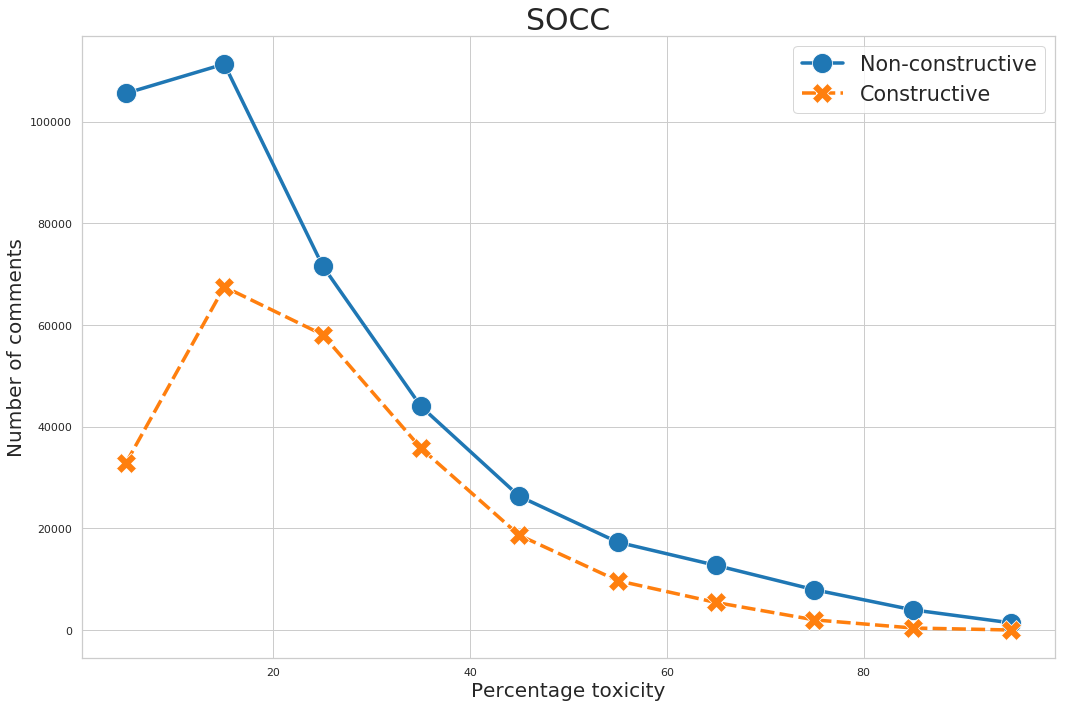

In [18]:
preprocessed_socc = preprocessing(socc_constructiveness, socc_toxicity)
preprocessed = preprocessed_socc[preprocessed_socc['toxicity_category'] >= 0]
fig = plotConstructivenessToxicity(preprocessed, 'toxicity_category', 'pp_comment_text', 'Prediction')
plt.title('SOCC', fontsize=30)
plt.tight_layout()

if SAVE:
    plt.savefig(SAVE_FOLDER+'/SOCC.png')
else:
    plt.show()

## The Tyee

In [19]:
tyee_constructiveness = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/The_Tyee_data/Tyee analysis/tyee_constructiveness_results.csv')
tyee_toxicity = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/The_Tyee_data/Tyee analysis/tyee_toxicity_results.csv')

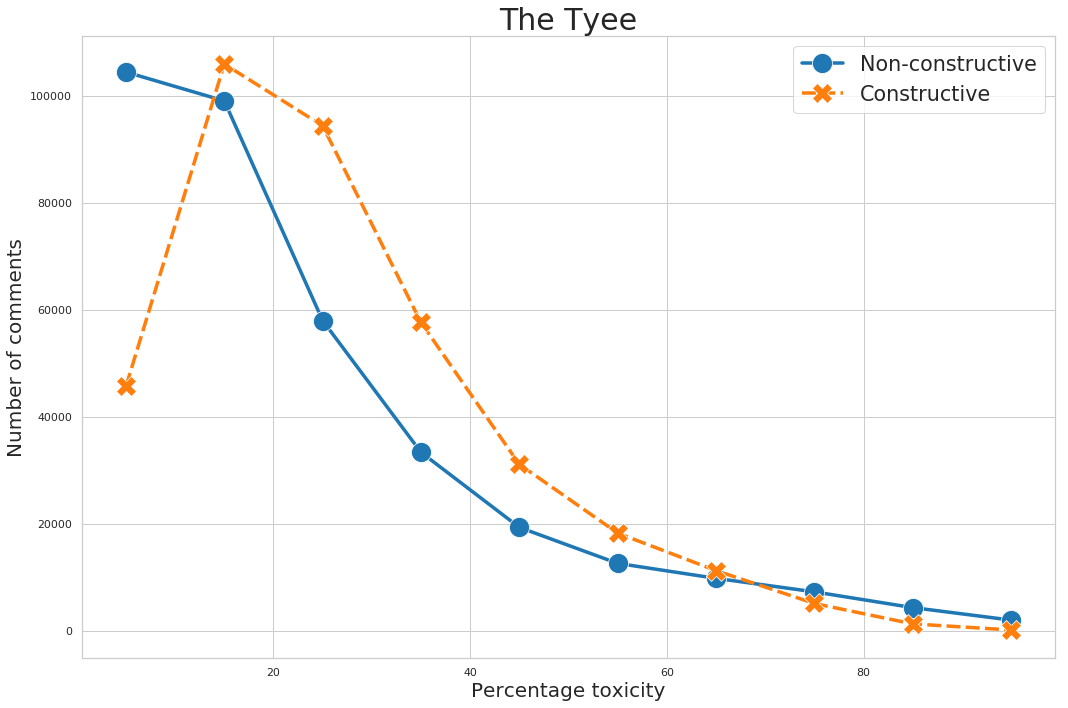

In [20]:
preprocessed_tyee = preprocessing(tyee_constructiveness, tyee_toxicity)
preprocessed = preprocessed_tyee[preprocessed_tyee['toxicity_category'] >= 0]
fig = plotConstructivenessToxicity(preprocessed, 'toxicity_category', 'pp_comment_text', 'Prediction')
plt.title('The Tyee', fontsize=30)
plt.tight_layout()

if SAVE:
    plt.savefig(SAVE_FOLDER+'/The_Tyee.png')
else:
    plt.show()

## The Conversation

In [21]:
conv_constructiveness = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/The_Conversation_data/Conversation analysis/conversation_constructiveness_results.csv')
conv_toxicity = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/The_Conversation_data/Conversation analysis/conversation_toxicity_results.csv')

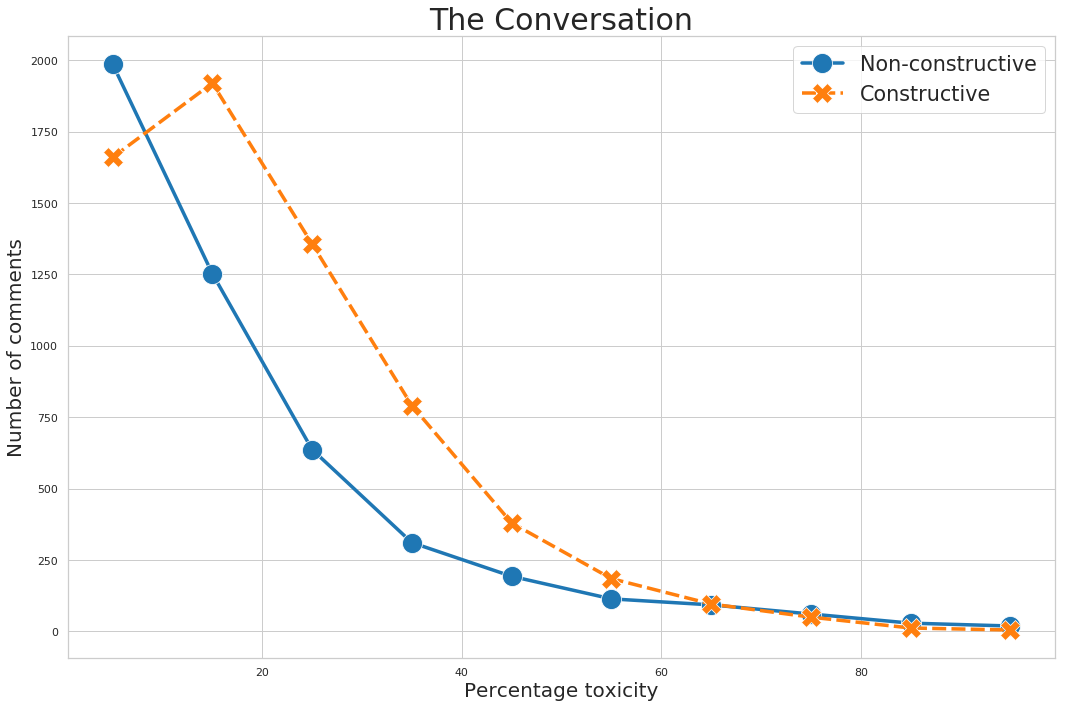

In [22]:
preprocessed_conv = preprocessing(conv_constructiveness, conv_toxicity)
preprocessed = preprocessed_conv[preprocessed_conv['toxicity_category'] >= 0]
fig = plotConstructivenessToxicity(preprocessed, 'toxicity_category', 'pp_comment_text', 'Prediction')
plt.title('The Conversation', fontsize=30)
plt.tight_layout()

if SAVE:
    plt.savefig(SAVE_FOLDER+'/The_Conversation.png')
else:
    plt.show()

## Everything

In [23]:
constructivenesss = pd.concat([socc_constructiveness, tyee_constructiveness, conv_constructiveness], axis=0, sort=False)
socc_toxicity['pp_comment_text'] = socc_toxicity['comment_text']
toxicity = pd.concat([socc_toxicity, tyee_toxicity, conv_toxicity], axis=0, sort=False, ignore_index=True)

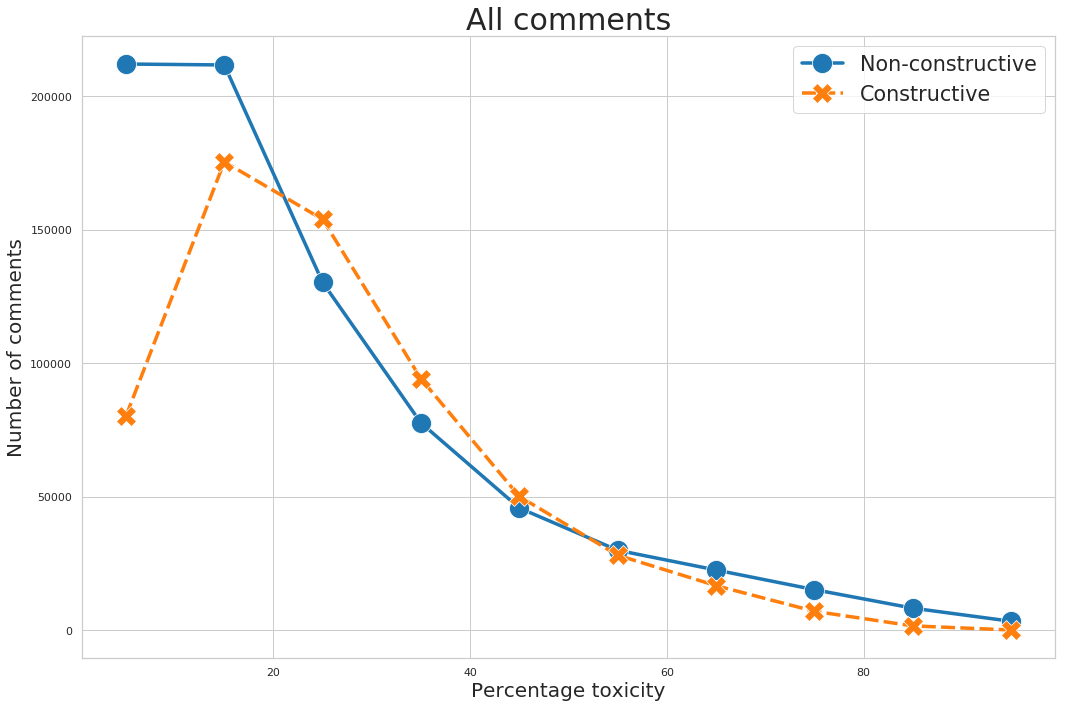

In [24]:
preprocessed = preprocessing(constructivenesss, toxicity)
preprocessed = preprocessed[preprocessed['toxicity_category'] >= 0]
fig = plotConstructivenessToxicity(preprocessed, 'toxicity_category', 'pp_comment_text', 'Prediction')
plt.title('All comments', fontsize=30)
plt.tight_layout()

if SAVE:
    plt.savefig(SAVE_FOLDER+'/All_comments.png')
else:
    plt.show()